# Milestone 3: Beyond Descriptive Statistics /Preparation By Aiman

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

In [19]:
summer_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Summer' ''')


In [20]:
winter_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Winter' ''')

# Diving Deeper: Uncovering Correlations and Trends¶
Calculating Pearson Correlation Coefficient between Total Winter and Summer Olympic Medals 1- Calculate the total number of medals for each year in both the Winter and Summer Olympics. 2- Compute the Pearson correlation coefficient between these two sets of total medal counts.

In [22]:
summer_medal_by_year = pysqldf('''
          SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM summer_events
                  GROUP BY Year
''')

In [23]:
winter_medal_by_year = pysqldf('''
          SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM winter_events
                  GROUP BY Year
''')

In [24]:
print(summer_medal_by_year.head(10))

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256
5  1912         4040          941         326           315           300
6  1920         4292         1308         493           448           367
7  1924         5233          832         277           281           274
8  1928         4992          734         245           239           250
9  1932         2969          647         229           214           204


In [25]:
print(winter_medal_by_year.head(10))

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46
5  1952         1088          136          45            44            47
6  1956         1307          150          51            49            50
7  1960         1116          147          50            48            49
8  1964         1778          186          61            67            58
9  1968         1891          199          66            70            63


Because the Winter Olympics began in 1924, while the Summer Olympics started back in 1896, there's a difference in the lengths of the arrays that show medal counts. To address this, I need to create a new table that only includes Summer Olympics data starting from 1924. This way, both datasets will have matching lengths, making it easier to compare the medal counts between Winter and Summer Olympics effectively.

In [26]:
summer_medal_by_year_1 = summer_medal_by_year[7:]

In [27]:
print(summer_medal_by_year_1.head(10))

    Year  total_count  medal_count  gold_count  silver_count  bronze_count
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270          897         306           291           300
13  1956         5127          893         302           293           298
14  1960         8119          911         309           294           308
15  1964         7702         1029         347           339           343
16  1968         8588         1057         359           340           358


Now second step is to calculate the Pearon correlation coefficient between the total number of medals in the winter and summer olympics from 1924 to 2016.

In [33]:
x = summer_medal_by_year_1.medal_count
y = winter_medal_by_year.medal_count
correlation_coefficient = np.corrcoef(x,y)

print("Pearson Correlation Coefficient:\n", correlation_coefficient)

Pearson Correlation Coefficient:
 [[1.         0.94141801]
 [0.94141801 1.        ]]


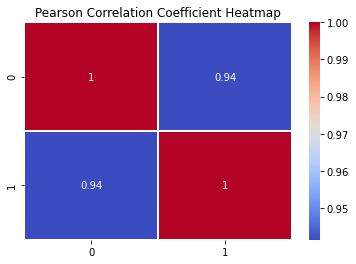

In [34]:
sns.heatmap(correlation_coefficient, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Coefficient Heatmap")
plt.show()

The Pearson Correlation Coefficient matrix reveals a robust positive correlation of around 0.9414 between a country's performance in the Winter Olympics and its performance in the Summer Olympics. This indicates that how well a country performs in one type of Olympics tends to be closely linked to its performance in the other type. However, it's essential to note that correlation doesn't imply causation, and additional investigation is needed to understand the factors driving this connection.

In [35]:
summer_std = np.std(x)
winter_std = np.std(y)

In [36]:
print("standard deviation of summer's medal count: ",summer_std)
print("standard deviation of winter's medal count: ",winter_std)

standard deviation of summer's medal count:  475.323015441357
standard deviation of winter's medal count:  152.56899942903493


From 1924 to 2016, we observed that the standard deviation of medal counts in the Summer Olympics is approximately three times larger than that in the Winter Olympics. This indicates that the performance of countries by year tends to exhibit greater variation in the Summer Olympics compared to the Winter Olympics. The wider spread of data points in the Summer Olympics suggests more pronounced fluctuations in medal counts over the years, reflecting a potentially more dynamic and competitive landscape in those games.

# Going Beyond: Exploring Hidden Connections and Influences

# Analyzing the Influence of Age on Medal-Winning Probability

In [37]:
pysqldf('''SELECT
           CASE WHEN Age BETWEEN 24 AND 26 THEN 'Around 25'
           ELSE 'Other Ages' END AS AgeGroup,
           COUNT(*) AS TotalAthletes,
           SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS MedalWinners,
ROUND((CAST(SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*)) * 100, 2) AS MedalWinningPercentage
FROM
   athlete_events
GROUP BY
    AgeGroup;

''')

,AgeGroup,TotalAthletes,MedalWinners,MedalWinningPercentage
0,Around 25,59102,9337,15.80
1,Other Ages,212014,30446,14.36


Summary: The analysis aimed to understand whether athletes around the age of 25 demonstrate a higher probability of winning medals in their respective events. The data was segmented into two age groups: "Around 25" (ages 24-26) and "Other Ages." The results revealed that athletes around 25 years old had a medal-winning percentage of 15.80%, while the medal-winning percentage for other age groups was 14.36%. This suggests that there is a slight increase in the likelihood of winning medals for athletes around the age of 25 compared to other age groups. This insight sheds light on the potential influence of age on peak athletic performance and success in competitive events.

# Investigating the Relationship: Do Developed Countries Earn More Olympic Medals?

In [38]:
pysqldf('''SELECT Team,
                  NOC, 
                  COUNT(Medal) 
           FROM athlete_events
           WHERE Medal IS NOT NULL
           GROUP BY NOC 
           ORDER BY COUNT(Medal) DESC''').head(50)

,Team,NOC,COUNT(Medal)
0,United States,USA,5637
1,Soviet Union,URS,2503
2,Germany,GER,2165
3,Great Britain,GBR,2068
4,France,FRA,1777
5,Italy,ITA,1637
6,Sweden,SWE,1536
7,Canada,CAN,1352
8,Australia,AUS,1320
9,Russia,RUS,1165


Summary: Our analysis of historical Olympic medal counts by country indicates a pattern where developed nations such as the United States, Soviet Union, Germany, and Great Britain have consistently secured substantial medal counts. While this trend supports the hypothesis that developed countries accumulate more medals, it's crucial to recognize that various factors beyond development status contribute to these achievements. Further exploration is necessary to fully grasp the intricate interplay between a country's development and its success in the Olympics.